# Practice Session 05: Hubs and authorities


In this session we will compute Hubs and Authorities using [NetworkX](https://networkx.github.io/), a Python package. This analysis is inspired by a paper on international trade ([Deguchi et al. 2014](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0100338)).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2010-flows.csv`` international trade in 2010
* ``trade-2021-flows.csv`` international trade in 2021 (except Austria and France: 2022)
* ``trade-countries.csv`` list of countries and territories

Plese note that the [HITS](https://en.wikipedia.org/wiki/HITS_algorithm) or hubs and authorities algorithm is implemented in NetworkX and elsewhere, but the other implementations follow a different design. Do this assignment on your own, following the design in this Notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories. 

This is a comma-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# Leave this cell as-is

INPUT_NAMES_FILENAME = "trade-countries.csv"
INPUT_TRADE_OLD = "trade-2010-flows.csv"
YEAR_OLD = 2010
INPUT_TRADE_NEW = "trade-2021-flows.csv"
YEAR_NEW = 2021

In [3]:
id2name = {}

<font size="+1" color="red">Replace this cell with your code to read country names into id2name.</font>

Test the mapping using the following code.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [5]:
# LEAVE AS-IS, it should print "Germany"

print(id2name["DEU"])

Germany


# 2. Read flows data into two graphs

## 2.1. Read amount traded

The files `INPUT_TRADE_OLD` and `INPUT_TRADE_NEW` contain three columns:

* from (country from which the goods or services are exported)
* to (country that receives the goods or services)
* amount (total amount in USD)

Read the graphs as directed graphs into variables `gOld` and `gNew` respectively.

You can create an empty graph using:

```python
g = nx.DiGraph()
```

By default the columns read by a DictReader are string, but you can convert the column containing the amount exported to a floating point number by using `float()`. Divide the `amount` by one million and round to the nearest integer, so the weights will be expressed in millions of dollars.

To add a weighted edge in *g* from node *u* to node *v* with weight *w*, use `g.add_edge(u, v, weight=w)`.

**Important:** create only the nodes corresponding to countries listed in ``INPUT_NAMES_FILENAME`` (keys in ``id2name``)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to read the two graphs: ``gOld`` and ``gNew``.</font>

The following should print:

```
The 2010 graph contains 33 nodes
The 2021 graph contains 33 nodes
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [7]:
# LEAVE AS-IS

print("The {:d} graph contains {:d} nodes".format(YEAR_OLD, gOld.number_of_nodes()))
print("The {:d} graph contains {:d} nodes".format(YEAR_NEW, gNew.number_of_nodes()))

The 2010 graph contains 33 nodes
The 2021 graph contains 33 nodes


The following should print:

```
In 2010, ESP (Spain) exported to FRA (France) goods and services for 45,052 USD millions
by 2021, it exported 59,700 USD millions

In 2010, ESP (Spain) exported to DEU (Germany) goods and services for 25,973 USD millions
by 2021, it exported 38,352 USD millions

In 2010, PRT (Portugal) exported to FRA (France) goods and services for 5,912 USD millions
by 2021, it exported 9,871 USD millions

In 2010, PRT (Portugal) exported to DEU (Germany) goods and services for 6,412 USD millions
by 2021, it exported 8,291 USD millions
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [8]:
# LEAVE AS-IS

for exporter in ["ESP", "PRT"]:
    for importer in ["FRA", "DEU"]:
        print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services for {:,d} USD millions".format(
            YEAR_OLD, exporter, id2name[exporter], importer, id2name[importer],
               gOld.get_edge_data(exporter, importer)["weight"]) )

        print("by {:d}, it exported {:,d} USD millions".format(YEAR_NEW, gNew.get_edge_data(exporter, importer)["weight"]))
        print("")
    

In 2010, ESP (Spain) exported to FRA (France) goods and services for 45,052 USD millions
by 2021, it exported 59,700 USD millions

In 2010, ESP (Spain) exported to DEU (Germany) goods and services for 25,973 USD millions
by 2021, it exported 38,352 USD millions

In 2010, PRT (Portugal) exported to FRA (France) goods and services for 5,912 USD millions
by 2021, it exported 9,871 USD millions

In 2010, PRT (Portugal) exported to DEU (Germany) goods and services for 6,412 USD millions
by 2021, it exported 8,291 USD millions



## 2.2. Compute totals

Next, compute the total exports of each country, into two dictionaries: `exportsOld` and `exportsNew`, with keys being country codes, and values being total exports. Do the same with total imports, into variables `importsOld` and `importsNew`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To iterate through the edges of a graph, you can use:

```python
for u, v, d in g.edges(data=True):
    w = d['weight']
    # u is the source, v the destination, w the weight
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)` to avoid duplication. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".

    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to compute totals into dictionaries exportsOld, exportsNew, importsOld, importsNew. Create a function *sum_weights* to avoid code duplication.</font>

The following should print:

```
Poland exported 128,160 USD Million in 2010 and 271,095 USD Million in 2021 (growth 2.1x),
 and imported 136,333 USD Million in 2010 and 251,993 USD Million in 2021 (growth 1.8x).

Spain exported 192,362 USD Million in 2010 and 294,287 USD Million in 2021 (growth 1.5x),
 and imported 224,917 USD Million in 2010 and 279,927 USD Million in 2021 (growth 1.2x).

Chile exported 31,615 USD Million in 2010 and 35,069 USD Million in 2021 (growth 1.1x),
 and imported 24,462 USD Million in 2010 and 35,868 USD Million in 2021 (growth 1.5x).
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [10]:
# LEAVE AS-IS

for country in ['POL', 'ESP', 'CHL']:
    print("{:s} exported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x),".format(
        id2name[country],
        exportsOld[country], YEAR_OLD,
        exportsNew[country], YEAR_NEW,
        exportsNew[country]/exportsOld[country]
    ))
    print(" and imported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x).".format(
        importsOld[country], YEAR_OLD,
        importsNew[country], YEAR_NEW,
        importsNew[country]/importsOld[country]
    ))
    print()

Poland exported 128,160 USD Million in 2010 and 271,095 USD Million in 2021 (growth 2.1x),
 and imported 136,333 USD Million in 2010 and 251,993 USD Million in 2021 (growth 1.8x).

Spain exported 192,362 USD Million in 2010 and 294,287 USD Million in 2021 (growth 1.5x),
 and imported 224,917 USD Million in 2010 and 279,927 USD Million in 2021 (growth 1.2x).

Chile exported 31,615 USD Million in 2010 and 35,069 USD Million in 2021 (growth 1.1x),
 and imported 24,462 USD Million in 2010 and 35,868 USD Million in 2021 (growth 1.5x).



The code below, which you should use as-is, converts the imports and exports into a [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [11]:
# LEAVE AS-IS

sorted_countries = sorted(id2name.keys())

flowsData = {
    'expOld': [(exportsOld[c] if c in exportsOld else 0) for c in sorted_countries],
    'impOld': [(importsOld[c] if c in importsOld else 0) for c in sorted_countries],
    'expNew': [(exportsNew[c] if c in exportsNew else 0) for c in sorted_countries], 
    'impNew': [(importsNew[c] if c in importsNew else 0) for c in sorted_countries],
}

flowsDF = pd.DataFrame(flowsData, index=sorted_countries)
flowsDF

,expOld,impOld,expNew,impNew
AUS,75635,85288,66228,98114
AUT,120131,133543,177134,173801
BEL,224624,298985,319464,363238
CAN,342352,310242,441451,387599
CHE,149601,174765,253904,262140
CHL,31615,24462,35069,35868
CZE,115923,97460,199125,151059
DEU,962139,761044,1235638,1056755
DNK,78310,66979,81521,92344
ESP,192362,224917,294287,279927


# 3. Draw the exports graphs

Draw the two graphs using NetworkX. Define an auxiliary function named `plotGraph(graph, exports)` for this, and use it to plot both graphs.

You can adapt the following code snippet. If `g` is a NetworkX graph in which weights are expressed in the variable *weight*, the following layouts a graph using a spring model. The constants *NODE_SIZE_MULTIPLIER* and *EDGE_WIDTH_MULTIPLIER* should be numbers smaller than one used to reduce the node sizes and edge widths to a manegeable size (set by trial and error, start from 0.01 but for both but modify them individually until the graph looks good).

```python
    plt.figure(figsize=(20,12))
    
    # Compute node sizes as a function of total exports
    node_sizes = []
    for node in g.nodes():
        node_sizes.append(exports[node] * NODE_SIZE_MULTIPLIER)

    # Compute edge widths as a function of exports
    edge_widths = []
    for u, v, d in g.edges(data=True):
        weight = math.log(d['weight']) * EDGE_WIDTH_MULTIPLIER
        edge_widths.append(weight)
        
    # Determine node positions
    pos = nx.spring_layout(g, iterations=100, weight="weight")
    
    # Draw nodes
    nx.draw_networkx_nodes(g, pos, node_color="orange", node_size=node_sizes)

    # Draw edges
    nx.draw_networkx_edges(g, pos, width=edge_widths, )

    # Draw labels and display graph
    _ = nx.draw_networkx_labels(g, pos, font_color="blue")
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to plot the two graphs.</font>

<font size="+1" color="red">Replace this cell with (1) a brief commentary on what are the similarities and differences you observe between these two graphs and (2) the answer to the following: there is a group of 3 countries that are actually close geographically, and also appear closely together in these graphs, what are the **names** of those 3 countries?</font>

# 4. Compute hubs and authorities

Implement the iterative algorithm seen in class for hubs and authorities. Instead of vectors, we will use two dictionaries having country names as keys. Dictionary `h` should contain the hub scores, while dictionary `a` should contain the authority scores.

Start from normalized hub scores: the hub score should be *1/N* for each country, where *N* is the number of countries.

Then, perform 100 iterations of the following:

1. Compute authority scores from hub scores (weighted sum of hub scores of incoming links times edge weights)
1. Normalize the authority scores.
1. Compute hub scores from authority scores (weighted sum of auhority scores of outgoing links times edge weights)
1. Normalize the hub scores.

Create two functions: `normalize(d)` that sums the values of a dictionary and then divides each one by the sum, returning the resulting dictionary, and `hubs_authorities(g, weight_key="weight")` that computes hubs and authorities using by default the edge key "weight" as a weight.

Notes:
1. You do *not* need to normalize edge weights.
1. It is OK if for countries that have no data (e.g., Estonia in 1980) some scores are NaN.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for function *normalize*</font>

The following should print:
    
```python
{'a': 0.5, 'b': 0.16666666666666666, 'c': 0.3333333333333333}```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [15]:
# LEAVE AS-IS

print(normalize({"a": 39, "b": 13, "c":26}))

{'a': 0.5, 'b': 0.16666666666666666, 'c': 0.3333333333333333}


<font size="+1" color="red">Replace this cell with your code for function *hubs_authorities(graph, weight_key="weight")*. Remember to include comments to explain what your code does at every relevant step.</font>

In [17]:
# LEAVE AS-IS
# Execution should be very fast (a few seconds maximum)

print("Computing for {:d}".format(YEAR_OLD))
(hOld,aOld) = hubs_authorities(gOld)

print("Computing for {:d}".format(YEAR_NEW))
(hNew,aNew) = hubs_authorities(gNew)

Computing for 2010
Computing for 2021


In [18]:
# LEAVE AS-IS

flowsDF['hOld'] = pd.Series(hOld)
flowsDF['aOld'] = pd.Series(aOld)
flowsDF['hNew'] = pd.Series(hNew)
flowsDF['aNew'] = pd.Series(aNew)

flowsDF

,expOld,impOld,expNew,impNew,hOld,aOld,hNew,aNew
AUS,75635,85288,66228,98114,0.008856,0.013926,0.006655,0.010975
AUT,120131,133543,177134,173801,0.014193,0.025587,0.014627,0.023609
BEL,224624,298985,319464,363238,0.027980,0.046006,0.028065,0.037360
CAN,342352,310242,441451,387599,0.168261,0.056977,0.171425,0.045188
CHE,149601,174765,253904,262140,0.023950,0.031025,0.038084,0.031625
CHL,31615,24462,35069,35868,0.005778,0.004732,0.007503,0.004526
CZE,115923,97460,199125,151059,0.011601,0.014956,0.012639,0.017356
DEU,962139,761044,1235638,1056755,0.113262,0.071773,0.107235,0.067649
DNK,78310,66979,81521,92344,0.008762,0.009422,0.005905,0.009110
ESP,192362,224917,294287,279927,0.021549,0.032318,0.021326,0.027793


Print the top 10 countries by exports and the top 10 countries by hub score in the newer dataset.

You can use a command like this: `display(dataframe.sort_values(by=colname, ascending=False).head(numrows))`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with commands to print top countries by exports and top countries by hub score.</font>

<font size="+1" color="red">Replace this cell with a brief commentary in which you compare the two lists above. Explain clearly what does it mean to be a country with high hub score versus being a country with high total exports.</font>

Print the top 10 countries by imports and the top 10 countries by authority score in the newer dataset.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with commands to print top countries by imports and top countries by authority score.</font>

<font size="+1" color="red">Replace this cell with a brief commentary in which you compare the two lists above. Explain clearly what does it mean to be a country with high authority score versus being a country with high total imports.</font>

# 5. Comparison of hub/export, authority/import scores

Now, we will compare the hub score of a country against its exports, and the authority scores of a country against its imports.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your function *plot_scatter*.</font>

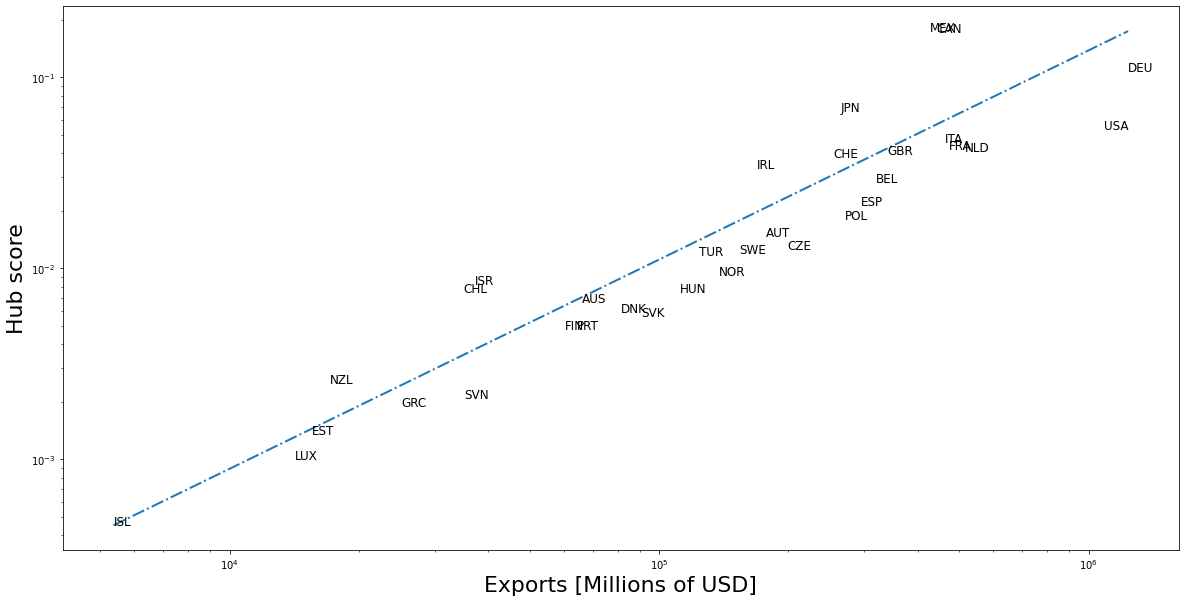

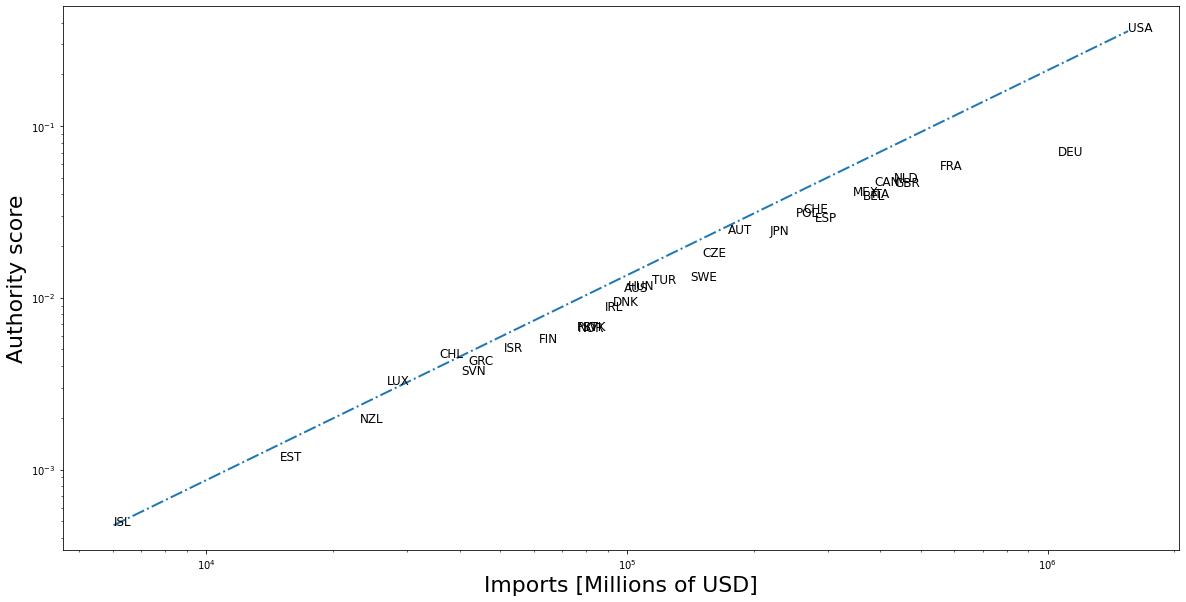

In [24]:
# LEAVE AS-IS: print plots for the newer dataset

plot_scatter( exportsNew, hNew, "Exports [Millions of USD]", "Hub score" )
plot_scatter( importsNew, aNew, "Imports [Millions of USD]", "Authority score" )

<font size="+1" color="red">Replace this cell with a brief commentary about the plots above with respect to (a) Hub scores versus exports, and (b) Authority scores versus imports.</font>

# DELIVER (individually)

A .zip file containing:

* This notebook.


## Extra points available

For extra points and extra learning, export this network to .csv, export the hub scores to a separate .csv file, and import both in Cytoscape. Then, do a clustering analysis in Cytoscape, color nodes by cluster, resize nodes according to hub scores, and insert the image on this Notebook, with a brief commentary.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: country clusters</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>